In [ ]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
#Read in the csv files.
movies = pd.read_csv('movie.csv')
ratings = pd.read_csv('rating.csv')

Displaying the movies dataframe.


In [ ]:
#display the movies dataframe.
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


Displaying the ratings dataframe.

In [ ]:
#Display the ratings dataframe.
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


modifying the movies dataframe to exclude all entries with no genres listed.

In [ ]:
##Remove any movies with a genre in order to keep consistentcies with the data.
movies.drop(movies[movies['genres'].str.contains("(no genres listed)")].index, inplace = True) 
movies

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27272,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure


# Handling the Adventure genre data

Sorting through the movies dataframe for the all adventure movies to place into one dataframe called adventureMovies.

In [ ]:
#Isolate Adventure movies into a separate dataframe. 
adventureMovies = movies[(movies.genres.str.contains('|'.join(['Adventure'])))]
adventureMovies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
7,8,Tom and Huck (1995),Adventure|Children
9,10,GoldenEye (1995),Action|Adventure|Thriller
12,13,Balto (1995),Adventure|Animation|Children
...,...,...,...
27217,131084,Hui Buh: The Castle Ghost (2006),Adventure|Comedy|Fantasy
27221,131092,"Mickey, Donald, Goofy: The Three Musketeers (2...",Adventure|Animation|Children|Comedy
27270,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy
27275,131258,The Pirates (2014),Adventure


*adventureRatings* dataframe will now contain all ratings from all users under the adventure genre tag.

In [ ]:
##inner-merging the adventure movie dataframe with the ratings dataframe to eliminate any ratings that 
#are not adventure movies as well as any movies without any ratings.

adventureRatings = pd.merge(adventureMovies, ratings, on=['movieId'], how='inner')
adventureRatings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41
...,...,...,...,...,...,...
4380346,131084,Hui Buh: The Castle Ghost (2006),Adventure|Comedy|Fantasy,79570,2.5,2015-03-29 18:48:28
4380347,131092,"Mickey, Donald, Goofy: The Three Musketeers (2...",Adventure|Animation|Children|Comedy,79570,3.0,2015-03-29 18:57:42
4380348,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,79570,4.0,2015-03-30 19:04:48
4380349,131258,The Pirates (2014),Adventure,28906,2.5,2015-03-30 19:56:32


In [ ]:
#Find the total ratings for each individual Adventure movie.
numOfRatingsForEachAdventureMovie = adventureRatings['movieId'].value_counts()

#Convert series into pandas dataframe.
numOfRatingsForEachAdventureMovie = numOfRatingsForEachAdventureMovie.to_frame()

#Cleanup the dataframe by renaming and moving columns.
numOfRatingsForEachAdventureMovie = numOfRatingsForEachAdventureMovie.reset_index()
numOfRatingsForEachAdventureMovie = numOfRatingsForEachAdventureMovie.rename(columns={"movieId": "number of ratings", "index": "movieId"})
numOfRatingsForEachAdventureMovie

,movieId,number of ratings
0,480,59715
1,260,54502
2,1,49695
3,150,47777
4,780,47048
...,...,...
2282,96504,1
2283,116983,1
2284,116979,1
2285,125173,1


In [ ]:
#Finding the average number of ratings for each Adventure movie.
averageNumberOfRatingsForEachAdventureMovie = numOfRatingsForEachAdventureMovie['number of ratings'].mean(axis = 0) 
averageNumberOfRatingsForEachAdventureMovie


1915.3261915172716

# Handling the Comedy genre data


Sorting through the movies dataframe for the all comedy movies to place into one dataframe called comedyMovies.

In [ ]:
#Isolate Comedy movies into a separate dataframe. 
comedyMovies = movies[(movies.genres.str.contains('|'.join(['Comedy'])))]
comedyMovies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance
...,...,...,...
27270,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy
27271,131250,No More School (2000),Comedy
27272,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror
27273,131254,Kein Bund für's Leben (2007),Comedy


*comedyRatings* dataframe will now contain all ratings from all users under the comedy genre tag.

In [ ]:
##inner-merging the Comedy movie dataframe with the ratings dataframe to eliminate any ratings that 
#are not Comedy movies as well as any movies without any ratings.
comedyRatings = pd.merge(comedyMovies, ratings, on=['movieId'], how='inner')
comedyRatings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41
...,...,...,...,...,...,...
7502229,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,79570,4.0,2015-03-30 19:04:48
7502230,131250,No More School (2000),Comedy,79570,4.0,2015-03-30 19:16:42
7502231,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,79570,4.0,2015-03-30 19:20:55
7502232,131254,Kein Bund für's Leben (2007),Comedy,79570,4.0,2015-03-30 19:32:59


In [ ]:
#Find the total ratings for each individual Comedy movie.
numOfRatingsForEachComedyMovie = comedyRatings['movieId'].value_counts()

#Convert series into pandas dataframe.
numOfRatingsForEachComedyMovie = numOfRatingsForEachComedyMovie.to_frame()

#Cleanup the dataframe by renaming and moving columns.
numOfRatingsForEachComedyMovie = numOfRatingsForEachComedyMovie.reset_index()
numOfRatingsForEachComedyMovie = numOfRatingsForEachComedyMovie.rename(columns={"movieId": "number of ratings", "index": "movieId"})
numOfRatingsForEachComedyMovie

,movieId,number of ratings
0,296,67310
1,356,66172
2,1,49695
3,2858,44987
4,608,43272
...,...,...
8227,74478,1
8228,116602,1
8229,87915,1
8230,105829,1


In [ ]:
#Finding the average number of ratings for each Comedy movie.
averageNumberOfRatingsForEachComedyMovie = numOfRatingsForEachComedyMovie['number of ratings'].mean(axis = 0) 
averageNumberOfRatingsForEachComedyMovie

911.3500971817298

In [ ]:
#Finding the average number of ratings for each Comedy and Adventure movie.
averageNumberOfRatingsForEachMovie = (averageNumberOfRatingsForEachComedyMovie + averageNumberOfRatingsForEachAdventureMovie)/2
averageNumberOfRatingsForEachMovie 

1413.3381443495007

The x-axis represents the *Movie ID*, and the y-axis represents the *Total Number of Ratings*.

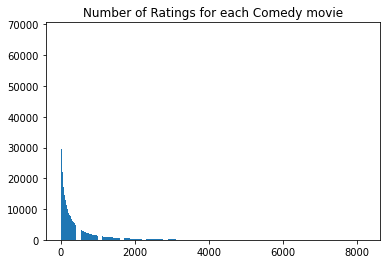

In [ ]:
#Plot the individual movies and the number of ratings they have.
plt.plot() 
plt.title('Number of Ratings for each Comedy movie') 
plt.bar(numOfRatingsForEachComedyMovie.index, numOfRatingsForEachComedyMovie['number of ratings']) 
plt.show() 

Removing any Comedy movies with less than 100 ratings to dispose of any outliers.



In [ ]:
#Remove any Comedy movies with less than 100 total ratings.
truncatedRatingsForComedy = numOfRatingsForEachComedyMovie[numOfRatingsForEachComedyMovie['number of ratings'] > 99]
truncatedRatingsForComedy

,movieId,number of ratings
0,296,67310
1,356,66172
2,1,49695
3,2858,44987
4,608,43272
...,...,...
3102,6616,101
3103,69988,101
3104,3568,101
3105,4289,101


Average number of ratings after excluding all movies with number of ratings below 100.

In [ ]:
#Finding the average number of ratings for each Comedy movie after 
#removing movies with less than 100 ratings.
avgTruncatedRatingsForComedy = truncatedRatingsForComedy['number of ratings'].mean(axis = 0) 
avgTruncatedRatingsForComedy

2385.0753138075315

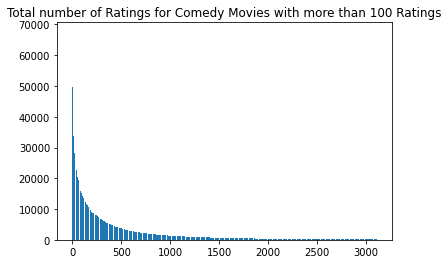

In [ ]:
#Plot to display Comedy movie's with the number of ratings
#after removing movies with less than 100 ratings. 
plt.plot() 
plt.title('Total number of Ratings for Comedy Movies with more than 100 Ratings') 
plt.bar(truncatedRatingsForComedy.index, truncatedRatingsForComedy['number of ratings']) 
plt.show() 

In [ ]:
#Remove any Adventure movies with less than 100 total ratings.
truncatedRatingsForAdventure = numOfRatingsForEachAdventureMovie[numOfRatingsForEachAdventureMovie['number of ratings'] > 99]
truncatedRatingsForAdventure

,movieId,number of ratings
0,480,59715
1,260,54502
2,1,49695
3,150,47777
4,780,47048
...,...,...
1032,33558,102
1033,41411,102
1034,65435,102
1035,6173,101


In [ ]:
#Finding the average number of ratings for each Adventure movie after 
#removing movies with less than 100 ratings.
avgtruncatedRatingsForAdventure = truncatedRatingsForAdventure['number of ratings'].mean(axis = 0) 
avgtruncatedRatingsForAdventure

4202.999035679845

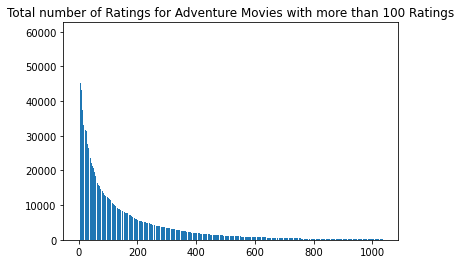

In [ ]:
#Plot to display Adventure movie's with the number of ratings
#after removing movies with less than 100 ratings. 
plt.plot() 
plt.title('Total number of Ratings for Adventure Movies with more than 100 Ratings') 
plt.bar(truncatedRatingsForAdventure.index, truncatedRatingsForAdventure['number of ratings']) 
plt.show() 

# User data for Adventure movies

In [ ]:
##inner-merging the culled Adventure movie ratings dataframe with the ratings dataframe to eliminate any ratings that 
#do not show up in the culled dataframe.
truncatedUserDataForAdventureMovies = pd.merge(truncatedRatingsForAdventure, ratings, on=['movieId'], how='inner')
truncatedUserDataForAdventureMovies = truncatedUserDataForAdventureMovies.drop(['number of ratings'], axis=1)
truncatedUserDataForAdventureMovies

,movieId,userId,rating,timestamp
0,480,2,5.0,2000-11-21 15:32:00
1,480,3,5.0,1999-12-14 12:50:20
2,480,4,4.0,1996-08-24 09:29:04
3,480,5,4.0,1996-12-25 15:25:15
4,480,7,5.0,2002-01-16 18:46:19
...,...,...,...,...
4358505,112911,131407,3.5,2014-10-28 06:57:34
4358506,112911,131904,3.0,2014-10-31 21:02:33
4358507,112911,132595,3.0,2015-01-08 04:14:57
4358508,112911,135765,3.0,2014-11-17 21:56:27


In [ ]:
#Finding the average rating for each user in the Adventure Genre.
averageTruncatedUserRatingsForAdventureMovies = truncatedUserDataForAdventureMovies.groupby('userId')['rating'].mean()

#Cleanup the dataframe by renaming and moving columns.
averageTruncatedUserRatingsForAdventureMovies = averageTruncatedUserRatingsForAdventureMovies.reset_index()
averageTruncatedUserRatingsForAdventureMovies = averageTruncatedUserRatingsForAdventureMovies.rename(columns={"rating": "average adventure rating"})
averageTruncatedUserRatingsForAdventureMovies

,userId,average adventure rating
0,1,3.787671
1,2,4.823529
2,3,4.220000
3,4,3.833333
4,5,4.523810
...,...,...
137874,138489,3.916667
137875,138490,4.000000
137876,138491,2.562500
137877,138492,3.558824


# User data for Comedy movies

In [ ]:
##inner-merging the culled Comedy movie ratings dataframe with the ratings dataframe to eliminate any ratings that 
#do not show up in the culled dataframe.
truncatedUserDataForComedyMovies = pd.merge(truncatedRatingsForComedy, ratings, on=['movieId'], how='inner')
truncatedUserDataForComedyMovies = truncatedUserDataForComedyMovies.drop(['number of ratings'], axis=1)
truncatedUserDataForComedyMovies

,movieId,userId,rating,timestamp
0,296,1,4.0,2005-04-02 23:32:47
1,296,8,5.0,1996-06-05 11:11:21
2,296,11,3.5,2009-01-02 01:13:19
3,296,13,5.0,1996-11-27 08:12:46
4,296,15,3.0,1996-08-16 14:44:02
...,...,...,...,...
7410424,30867,134210,1.0,2010-05-01 23:11:09
7410425,30867,135186,3.0,2010-06-27 02:12:00
7410426,30867,135419,4.0,2009-10-02 18:24:21
7410427,30867,136268,2.0,2009-04-29 23:59:18


In [ ]:
#Finding the average rating for each user in the Comedy Genre.
averageTruncatedUserRatingsForComedyMovies = truncatedUserDataForComedyMovies.groupby('userId')['rating'].mean()

#Cleanup the dataframe by renaming and moving columns.
averageTruncatedUserRatingsForComedyMovies = averageTruncatedUserRatingsForComedyMovies.reset_index()
averageTruncatedUserRatingsForComedyMovies = averageTruncatedUserRatingsForComedyMovies.rename(columns={"rating": "average comedy rating"})
averageTruncatedUserRatingsForComedyMovies

,userId,average comedy rating
0,1,3.737500
1,2,3.900000
2,3,4.057692
3,4,3.545455
4,5,4.083333
...,...,...
138445,138489,3.636364
138446,138490,3.468750
138447,138491,2.650000
138448,138492,4.037736


In [ ]:
#Merge both dataframe genres containing the average ratings per user into
#one dataframe.
twoGenresUserRatings = pd.merge(averageTruncatedUserRatingsForAdventureMovies, averageTruncatedUserRatingsForComedyMovies, on=['userId'], how='inner')
twoGenresUserRatings

,userId,average adventure rating,average comedy rating
0,1,3.787671,3.737500
1,2,4.823529,3.900000
2,3,4.220000,4.057692
3,4,3.833333,3.545455
4,5,4.523810,4.083333
...,...,...,...
137833,138489,3.916667,3.636364
137834,138490,4.000000,3.468750
137835,138491,2.562500,2.650000
137836,138492,3.558824,4.037736


# Explicit Average Values

In [ ]:
#Finding the average rating score for each Adventure movie after 
#removing movies with less than 100 ratings.
avgtruncatedScoreForAdventure = twoGenresUserRatings['average adventure rating'].mean(axis = 0) 
avgtruncatedScoreForAdventure

3.5561473809118556

In [ ]:
#Finding the average rating score for each Adventure movie after 
#removing movies with less than 100 ratings.
avgtruncatedScoreForComedy = twoGenresUserRatings['average comedy rating'].mean(axis = 0) 
avgtruncatedScoreForComedy

3.5192336070785935

In [ ]:
#Finding the average rating score for each Adventure movie after 
#removing movies with less than 100 ratings.
avgTruncatedScoreForBothGenres = (avgtruncatedScoreForComedy + avgtruncatedScoreForAdventure)/2
avgTruncatedScoreForBothGenres

3.5376904939952247

# Setting up and running the kmeans model.

We take the average ratings for both Comedy and Adventure movies and shape it to fit our kmeans clustering model. 

In [ ]:
#define the shape of the comedy ratings dataframe
X = [twoGenresUserRatings['average comedy rating'], twoGenresUserRatings['average adventure rating']]
X = np.array(list(zip(twoGenresUserRatings['average comedy rating'], twoGenresUserRatings['average adventure rating']))).reshape(len(twoGenresUserRatings['userId']), 2) 

Establish a kmeans model using distortions to find the *elbow*, which will help us determine the optimal number of clusters. 



In [ ]:
#establish the kmeans model
distortions = [] 
mapping = {} 
K = range(3,10)

for k in K: 
    #Building and fitting the model 
    kmeanModelKneeGraph = KMeans(n_clusters=k).fit(X) 
    kmeanModelKneeGraph.fit(X)     

    distortions.append(sum(np.min(cdist(X, kmeanModelKneeGraph.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
  
    mapping[k] = sum(np.min(cdist(X, kmeanModelKneeGraph.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 

Plotting the elbow graph.

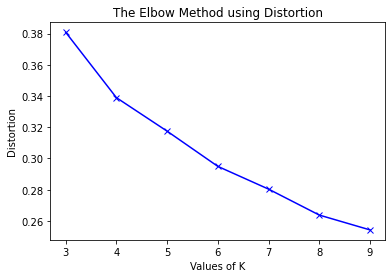

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

Running another Kmeans clustering model using 5 as our number of clusters. We chose this to help draw some conclusions between the two genres later on. 

In [ ]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(twoGenresUserRatings[twoGenresUserRatings.columns[1:3]]) # Compute k-means clustering.
twoGenresUserRatings['cluster_label'] = kmeans.fit_predict(twoGenresUserRatings[twoGenresUserRatings.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(twoGenresUserRatings[twoGenresUserRatings.columns[1:3]]) # Labels of each point
twoGenresUserRatings.head(10)

,userId,average adventure rating,average comedy rating,cluster_label
0,1,3.787671,3.737500,1
1,2,4.823529,3.900000,2
2,3,4.220000,4.057692,2
3,4,3.833333,3.545455,1
4,5,4.523810,4.083333,2
5,6,3.750000,3.666667,1
6,7,3.525424,3.221311,0
7,8,3.736842,3.640000,1
8,9,2.333333,2.909091,4
9,10,3.909091,4.000000,2


Colormap displaying the results of the kmeans clustering function. 

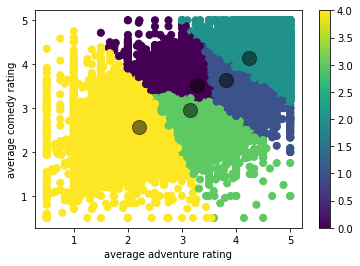

In [ ]:
#Create a colormap that displays 5 different group of watchers who have rated
#both an Adventure movie as well as a Comedy movie, along with
#their average ratings for both genres based on the kmeans clustering function.
twoGenresUserRatings.plot.scatter(x = 'average adventure rating', y = 'average comedy rating', c=labels, s=50, cmap='viridis', sharex=False)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


# Conclusion

For our dataset, we chose to remove any movies with less than 100 reviews as we saw that any movie with over 100 reviews is pretty significant. We also saw that it was a decent enough metric to cull the dataset in order to more accurately make sense of through a kmeans cluster function. This culling also helped with removing any outliers that would drastically affect the overall averages, making it less accurate than it should be. 

In [ ]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

roundedAvgtruncatedRatingsForAdventure = round(avgtruncatedRatingsForAdventure, 2)
roundedAvgtruncatedScoreForAdventure = round(avgtruncatedScoreForAdventure, 2)

roundedAverageNumberOfRatingsForEachMovie = round(averageNumberOfRatingsForEachMovie, 2)
roundedAverageScoreForEachMovie = round(avgTruncatedScoreForBothGenres, 2)

roundedAverageNumberOfRatingsForEachComedyMovie = round(averageNumberOfRatingsForEachComedyMovie, 2)
roundedAvgtruncatedScoreForComedy = round(avgtruncatedScoreForComedy, 2)

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b></b>','<b>ADVENTURE</b>','<b>COMEDY</b>','<b>Both Genres Combined</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['<b>Average Number of Ratings</b>', '<b>Average Rating</b>'],
      [roundedAvgtruncatedRatingsForAdventure, roundedAvgtruncatedScoreForAdventure],
      [roundedAverageNumberOfRatingsForEachComedyMovie , roundedAvgtruncatedScoreForComedy],
      [roundedAverageNumberOfRatingsForEachMovie, roundedAverageScoreForEachMovie]],
      
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

Based on the colormap results of the kmeans clustering function, we can determine that there are 5 different clusters of movie watchers that have rated movies for adventure and comdedy genres. Represented by the yellow, these movie watchers are the lower majority that either majorly favor one genre over the other, or do not favor either genre very much. The purple set of watchers prefer comedies over adventures while the light green prefers the opposite. Despite this, on average, they are likely to rate a the opposing genre decent scores. The blue set of watchers are the users that represent the minority that generally likes both genre types, while the teal subgroup absolutely adores both comedy and adventure genres. Looking at the distruption of the groups, we can say that the majority of the watchers are in the yellow subgroup, which means that they will greatly favor one genre over another or will not favor either. We can see however, that a good majority of watchers greatly favor both genres.

From the table, we can see that Adventure movies have more reviews than Comedy movies however, the average ratings for Adventure, Comedy, and both movies combined are around the same. The Comedy genre has a slightly better score than the Adventure genre, which means most ratings for Comedies are higher, after noting that average number of ratings for Comedies are much lower. This can be reflected with the colormap as some of the center cluster points are slightly higher in the direction of Comedy movies. 